# Table of contents
 1. [Introduction](#section1)
    - 1.1 [Data Description](#section2)
    - 1.2 [Objectives](#section3)
 2. [Data Exploration and Cleaning](#section4)
 3. [Data Visualization](#section5)
    - 3.1 [Movies Released per Year](#section6)
    - 3.2 [Top 20 Movies based on IMDB Rating](#section7)
    - 3.3 [Top 20 Directors with highest average IMDB Rating](#section8)
    - 3.4 [Movie ratings per genre](#section9)
 4. [Data Pre-Processing](#section10)
    - 4.1 [Drop Columns](#section11)
    - 4.2 [Bin IMDB Ratings](#section12)
    - 4.3 [Convert Object data to Numberical](#section13)
    - 4.4 [Training and Testing Data Split](#section14)
 5. [Implementing Machine Learning Algorithms](#section15)
    - 5.1 [XGBoost](#section16)
    - 5.2 [Random Forest](#section17)
    - 5.3 [Neural Networks](#section18)
 6. [Conclusion](#section19)

<a id='section1'></a>                                                                                                          <font size="4">**1. Introduction**</font>

IMDB is a database consisting of all most all movies ever released. The movie industry is one with tremendous financial implications and a movie's commercial success in the market is vital for the survival of a production house especially if they invest a significant amount into producing it. How do we know if a movie is a financial success? What comprises of a substantial investment? Is it possible to predict a movie's rating? Below we will look at the data obtained from IMDB and make rating predictions of any film.

<a id='section2'></a>
<font size="3">1.1 Data Description</font>

The dataset consists of a wide range of features and a variety of movies. It has 28 variables for 5043 movies with thousands of unique actors and directors. This dataset consists of films from 66 countries. It also has the investment made in a movie and the gross income.

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
dataRaw =pd.read_csv(r"C:\Users\hari0\Dropbox\Random Projects\Movie Metadata\movie_metadata.csv",sep=',')

In [109]:
dataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

<a id='section3'></a>
<font size="3">1.2 Objectives</font>

The primary objective of this project is to predict the rating of a movie using the data provided. It is interesting to analyze which factors impact the score of a film. We will also show the results of the analysis graphically to make it easy to understand them. 

The results from this project can help movie production houses to understand the factors that can help boost the commercial progress of a movie. 

<a id='section4'></a>
<font size="4">**2 Data Exploration and Cleaning**</font>

We can see from the data above that the length of each column is different which indicates that there are some missing values. There is a possibility that some data could be duplicate values. These two situations are the most likely fundamental issues faced with any data. 

Let us start by looking at the number of duplicates and the missing values in the dataset. 

In [110]:
dataRaw.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [111]:
dataRaw.duplicated().sum()

45

So we have 45 duplicate rows and many missing values. We can remove the duplicate data but there are too many missing values to drop all of them, so we need a better alternative. Let us look at the number of missing values, 'gross'has the maximum missing data at 884 which is considerably higher than the second highest which is 'budget' at 492 but this is also a considerable amount. Since the missing data from 'gross' and 'budget' is enormous, we will have to drop those rows as any addition of data could lead to wrong inferences. 

In [112]:
dataRaw = dataRaw.drop_duplicates()
dataRaw = dataRaw.dropna(subset=['gross', 'budget'])
dataRaw.shape

(3857, 28)

After removing the unwanted data, there are still 3857 rows of data available which is more than sufficient for our purpose. 

Now let us look at the facebook related data. We can see from above that there is not a lot of missing data from those variables. Any missing data correlated with its respective actual variable as in the 'director_name' has 104 missing values, and the 'director_facebook_likes' also has 104 missing values, and this is true with the actor data as well. The number of missing values are not high in comparison to the size of the data so we can take the mean of each of those columns to replace the NA values and it should not have a significant impact on the final predictions. 

We can do the same thing to some of the other variables as well such as 'facenumber_in_poster', 'num_user_for_reviews', 'num_critic_for_reviews'and 'duration'.

In [113]:
dataRaw.director_facebook_likes = dataRaw['director_facebook_likes'].fillna(dataRaw.director_facebook_likes.mean())
dataRaw.actor_3_facebook_likes = dataRaw['actor_3_facebook_likes'].fillna(dataRaw.actor_3_facebook_likes.mean())
dataRaw.actor_1_facebook_likes = dataRaw['actor_1_facebook_likes'].fillna(dataRaw.actor_1_facebook_likes.mean())
dataRaw.actor_2_facebook_likes = dataRaw['actor_2_facebook_likes'].fillna(dataRaw.actor_2_facebook_likes.mean())
dataRaw.facenumber_in_poster = dataRaw['facenumber_in_poster'].fillna(dataRaw.facenumber_in_poster.mean())
dataRaw.num_user_for_reviews = dataRaw['num_user_for_reviews'].fillna(dataRaw.num_user_for_reviews.mean())
dataRaw.num_critic_for_reviews = dataRaw['num_critic_for_reviews'].fillna(dataRaw.num_critic_for_reviews.mean())
dataRaw.duration = dataRaw['duration'].fillna(dataRaw.duration.mean())

Now that is done, lets look at 'aspect_ratio'. 

In [114]:
dataRaw.aspect_ratio.value_counts()

2.35     1995
1.85     1600
1.37       50
1.78       41
1.66       40
1.33       19
2.39       11
2.20       10
2.40        3
2.76        3
2.00        3
1.75        2
2.24        1
1.18        1
2.55        1
1.77        1
16.00       1
1.50        1
Name: aspect_ratio, dtype: int64

We can see from above that the number of movies with aspect ratios 2.35 and 1.85 is vastly more than the rest of the aspect ratios combined. Hence we can take the average of the rest of the aspect ratios and make it one value for within the aspect_ratio variable. This can reduce the complexity of the dataset, and this will also convert all NA values to mean of the variable. 

In [115]:
dataRaw.aspect_ratio[(dataRaw['aspect_ratio'] != 2.35) & (dataRaw['aspect_ratio'] != 1.85)] = dataRaw.aspect_ratio[(dataRaw['aspect_ratio'] != 2.35) & (dataRaw['aspect_ratio'] != 1.85)].mean()
dataRaw.aspect_ratio.value_counts()

D:\Users\hari0\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2.350000    1995
1.850000    1600
1.764149     262
Name: aspect_ratio, dtype: int64

At this stage let us take a look at the total missing values in the data.

In [116]:
dataRaw.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  5
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          0
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
dtype: int64

As we can see, most of the missing data has been dealt with. So how much of an impact does color and content rating have on movie rating? Let us look at the color below:

In [117]:
dataRaw.color.value_counts()

Color               3725
 Black and White     130
Name: color, dtype: int64

As we can see most of the films are color which indicates that this variable is likely to have minimal impact on the results and so can be removed. 

In [118]:
dataRaw = dataRaw.drop(['color'], axis=1)

Content_rating has quite a few different rating. This is probably because the rating standards used to be different previously and can be modified in different countries even though they indicate the same thing. Let us look at this below:

In [119]:
dataRaw.content_rating.value_counts()

R            1723
PG-13        1314
PG            573
G              91
Not Rated      42
Unrated        24
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

A little google search will tell us that 'Approves', 'Not Rated', 'Unrated', 'Passed' can be categorized as 'R'. 'M', 'GP', 'PG' essentially mean the same thing and this is also true with 'X' and 'NC-17'. So we are going to simplify these values to 'R', 'X', 'PG' respectively. 

In [120]:
dataRaw.content_rating = dataRaw.content_rating.replace(['Approved','Not Rated', 'Passed', 'Unrated'], 'R')      
dataRaw.content_rating = dataRaw.content_rating.replace(['M','GP'], 'PG')  
dataRaw.content_rating = dataRaw.content_rating.replace(['NC-17'], 'X')  
dataRaw.content_rating.value_counts()

R        1809
PG-13    1314
PG        576
G          91
X          16
Name: content_rating, dtype: int64

Since this is categorical data, we can replace the missing values; hence the only option is to delete the rows. 

In [121]:
dataRaw = dataRaw.dropna(subset=['content_rating'])

We are approaching the end of the data cleaning process. Looking at the 'language' and 'country' variables, it is fairly apparent that these are categorical variables and 'language' seems to be having two missing values.

In [122]:
dataRaw.language.value_counts()

English       3644
French          34
Spanish         24
Mandarin        14
German          11
Japanese        10
Cantonese        7
Italian          7
Korean           5
Hindi            5
Portuguese       5
Norwegian        4
Persian          3
Danish           3
Thai             3
Dutch            3
Indonesian       2
Aboriginal       2
Dari             2
Hebrew           2
Maya             1
Vietnamese       1
Russian          1
Hungarian        1
Romanian         1
Arabic           1
Czech            1
Mongolian        1
None             1
Zulu             1
Filipino         1
Aramaic          1
Bosnian          1
Kazakh           1
Name: language, dtype: int64

Looking at the 'language' value counts, it is clear that most of the movies are in English and so it is nearly constant which indicates that it is likely to have minimal impact on the results. It can hence be removed. 

In [123]:
dataRaw = dataRaw.drop(['language'], axis=1)

In [124]:
dataRaw.country.value_counts()

USA               3025
UK                 316
France             103
Germany             79
Canada              63
Australia           40
Spain               22
Japan               15
Hong Kong           13
China               13
New Zealand         11
Italy               11
Mexico              10
Denmark              9
South Korea          8
Ireland              7
India                5
Brazil               5
Norway               4
Thailand             4
Iran                 4
Argentina            3
Czech Republic       3
Netherlands          3
South Africa         3
Russia               3
Romania              2
Israel               2
Taiwan               2
Hungary              2
Colombia             1
Indonesia            1
Belgium              1
Greece               1
Aruba                1
New Line             1
Iceland              1
Official site        1
Finland              1
West Germany         1
Poland               1
Afghanistan          1
Peru                 1
Georgia    

We can see from above that most of the movies in IMDB database seem to be made in 'USA,' but one can argue that there are a fair amount of films from 'UK' and 'France' as well. In this case, we can convert the variable categories into 'USA', 'UK', 'France' and 'Others'.

In [125]:
dataRaw.country.loc[(dataRaw['country'] != 'USA') & (dataRaw['country'] != 'UK') & (dataRaw['country'] != 'France')] = 'Others'
dataRaw.country.value_counts()

D:\Users\hari0\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


USA       3025
Others     362
UK         316
France     103
Name: country, dtype: int64

Now we get to the most complicated part of the dataset, the 'genres' . 

In [126]:
dataRaw.genres.head()

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
5            Action|Adventure|Sci-Fi
Name: genres, dtype: object

A movie can have multiple genres as we can see above. We need to split this up before performing any kind of visualization or machine learning on it. 

In [ ]:

dataRaw = dataRaw.reset_index().drop(['index'], axis=1)
temp = dataRaw[['movie_title','genres']]
xyz = temp
temp1 = dataRaw
temp = pd.DataFrame(temp.genres.str.split('|').tolist(), index=temp.movie_title).stack()
temp = temp.reset_index([0, 'movie_title'])
temp.columns = ['movie_title', 'genres']
unique_genres =  temp.genres.unique()

count = 0

for i in unique_genres:
    xyz[i] = 0
    for j in range(0, len(temp1)):
        for k in xyz.genres.str.split('|').tolist()[j]:
            if i == k:
                xyz[i][j] = 1       
    print(count)
    count += 1

finaldf = pd.merge(temp1, xyz, on=['movie_title','genres'])
finaldf = finaldf.drop_duplicates(subset=['movie_title']).reset_index()
finaldf.fillna(0).to_csv('FinalData1.csv')



In [136]:
finaldf =pd.read_csv(r"C:\Users\hari0\Dropbox\Random Projects\Movie Metadata\FinalData1.csv",sep=',', encoding='ISO-8859-1', index_col=0)
dataRaw = finaldf.drop_duplicates(subset=['movie_title'], keep = False).reset_index()
dataRaw = dataRaw.drop(['Unnamed: 0.1', 'level_0', 'index', 'genres'], 1)

Our data is finally ready! So let us get started with the visualizations. 

<a id='section5'></a>
<font size="4">**3 Data Visualisation**</font>

So our data is processed and ready to go but what does that mean? Before we can run this data through some machine learning algorithm, it is essential that we first understand how the data is correlated, how each variable can potentially impact the movie ratings. While the machine learning algorithm finds the intrinsic connections, it is vital for us to have an overview of these connections. This can be done by visualization of the data. Let us start with the most obvious point, how many movies have been made over the years. 

<a id='section6'></a>
<font size="3">**3.1 Movies Released per Year**</font>

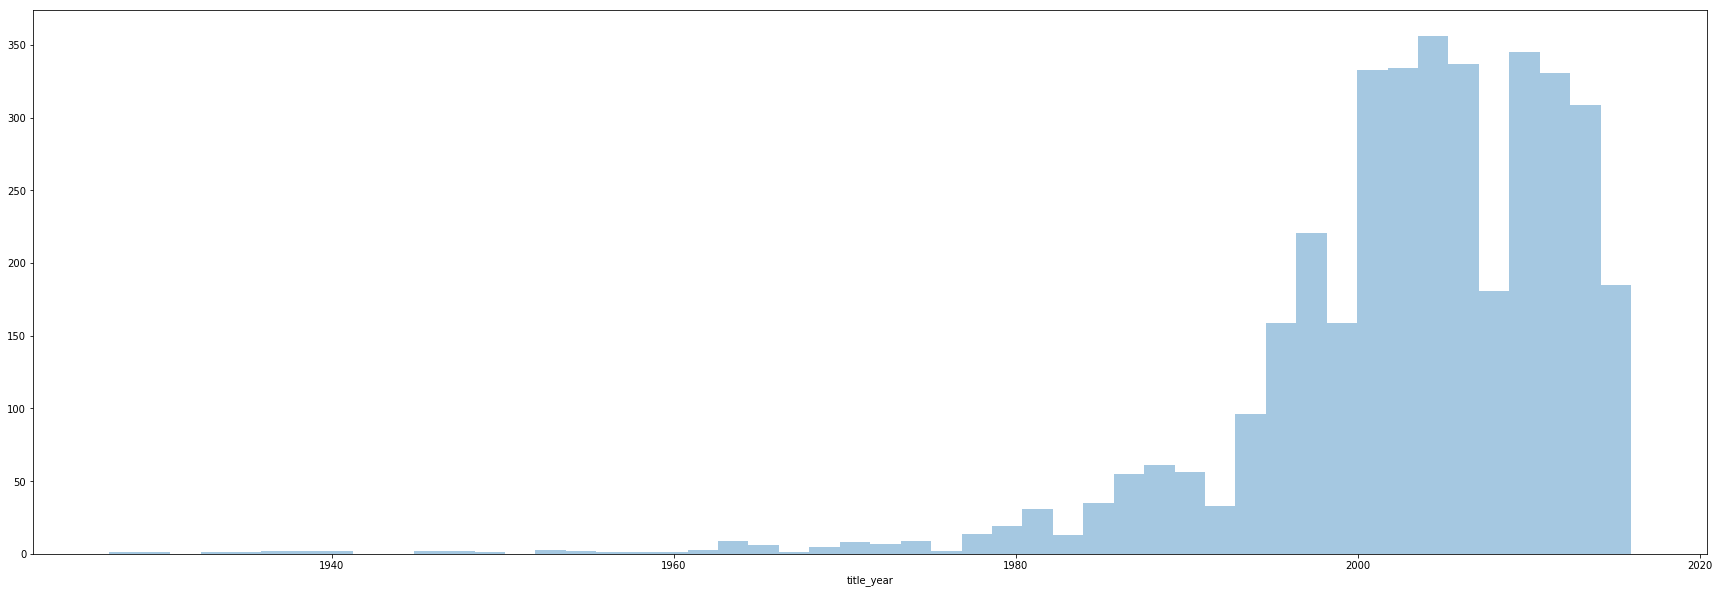

In [128]:
plt.figure(figsize=(30, 10))
sns.distplot(dataRaw.title_year, kde=False);

As expected most movies were made after the '80s, this could be due to the commercial implications of films mainly because of the advancement of modern technology.

<a id='section7'></a>
<font size="3">**3.2 Top 20 Movies based on IMDB Rating**</font>



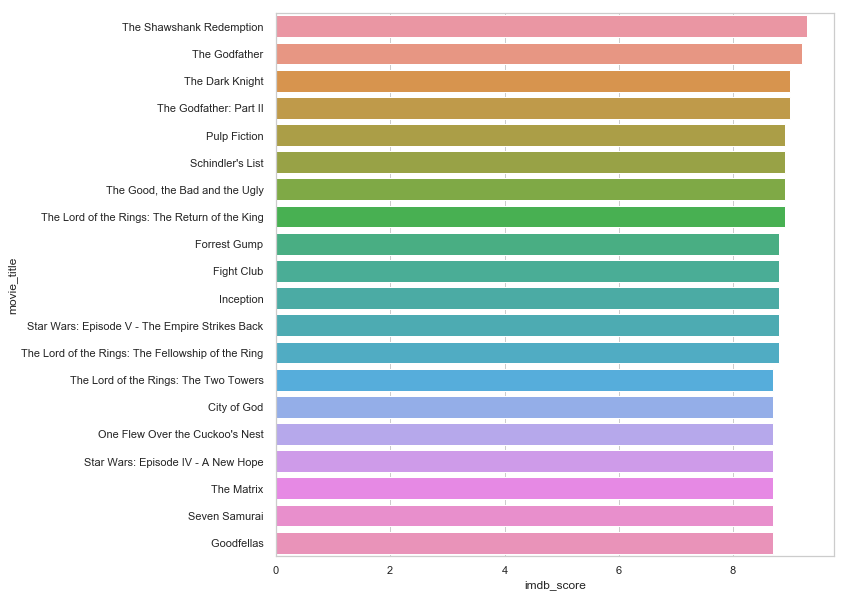

In [129]:
temp = dataRaw.sort_values('imdb_score', ascending=False).head(20)[['movie_title', 'imdb_score']]
plt.figure(figsize=(10, 10))
sns.set(style='whitegrid')
sns.barplot(y='movie_title', x='imdb_score', data=temp)

<a id='section8'></a>
<font size="3">**3.3 Top 20 Directors with highest average IMDB Rating**</font>

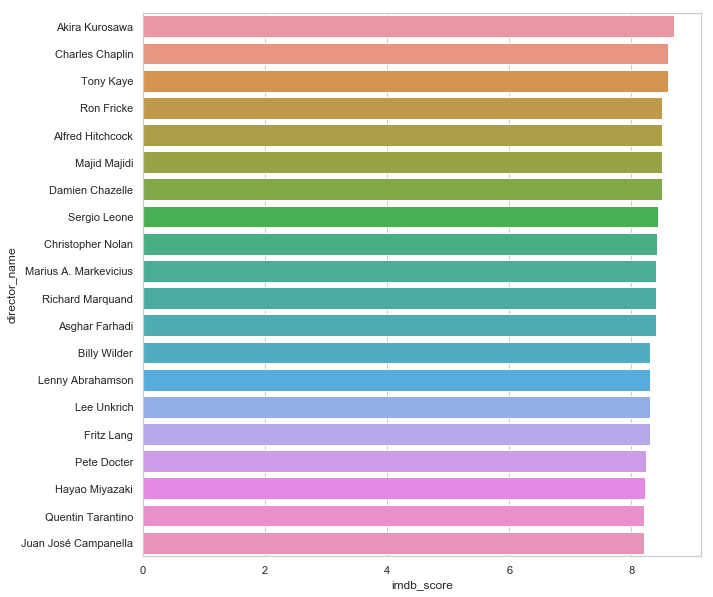

In [130]:
temp = dataRaw.groupby('director_name').mean()[['imdb_score']].sort_values('imdb_score', ascending=False).head(20).reset_index()
plt.figure(figsize=(10, 10))
sns.set(style='whitegrid')
sns.barplot(y='director_name', x='imdb_score', data=temp)

<a id='section9'></a>
<font size="3">**3.4 Movie ratings per genre**</font>



In [131]:
temp_act = dataRaw.loc[dataRaw.Action == 1][['imdb_score']]
temp_adv = dataRaw.loc[dataRaw.Adventure == 1][['imdb_score']]
temp_fan = dataRaw.loc[dataRaw.Fantasy == 1][['imdb_score']]
temp_sci = dataRaw.loc[dataRaw['Sci-Fi'] == 1][['imdb_score']]
temp_thr = dataRaw.loc[dataRaw.Thriller == 1][['imdb_score']]
temp_rom = dataRaw.loc[dataRaw.Romance == 1][['imdb_score']]
temp_com = dataRaw.loc[dataRaw.Comedy == 1][['imdb_score']]
temp_ani = dataRaw.loc[dataRaw.Animation == 1][['imdb_score']]
temp_fam = dataRaw.loc[dataRaw.Family == 1][['imdb_score']]
temp_hor = dataRaw.loc[dataRaw.Horror == 1][['imdb_score']]
temp_dra = dataRaw.loc[dataRaw.Drama == 1][['imdb_score']]
temp_crime = dataRaw.loc[dataRaw.Crime == 1][['imdb_score']]

Text(0.5,1,'Crime Movies')

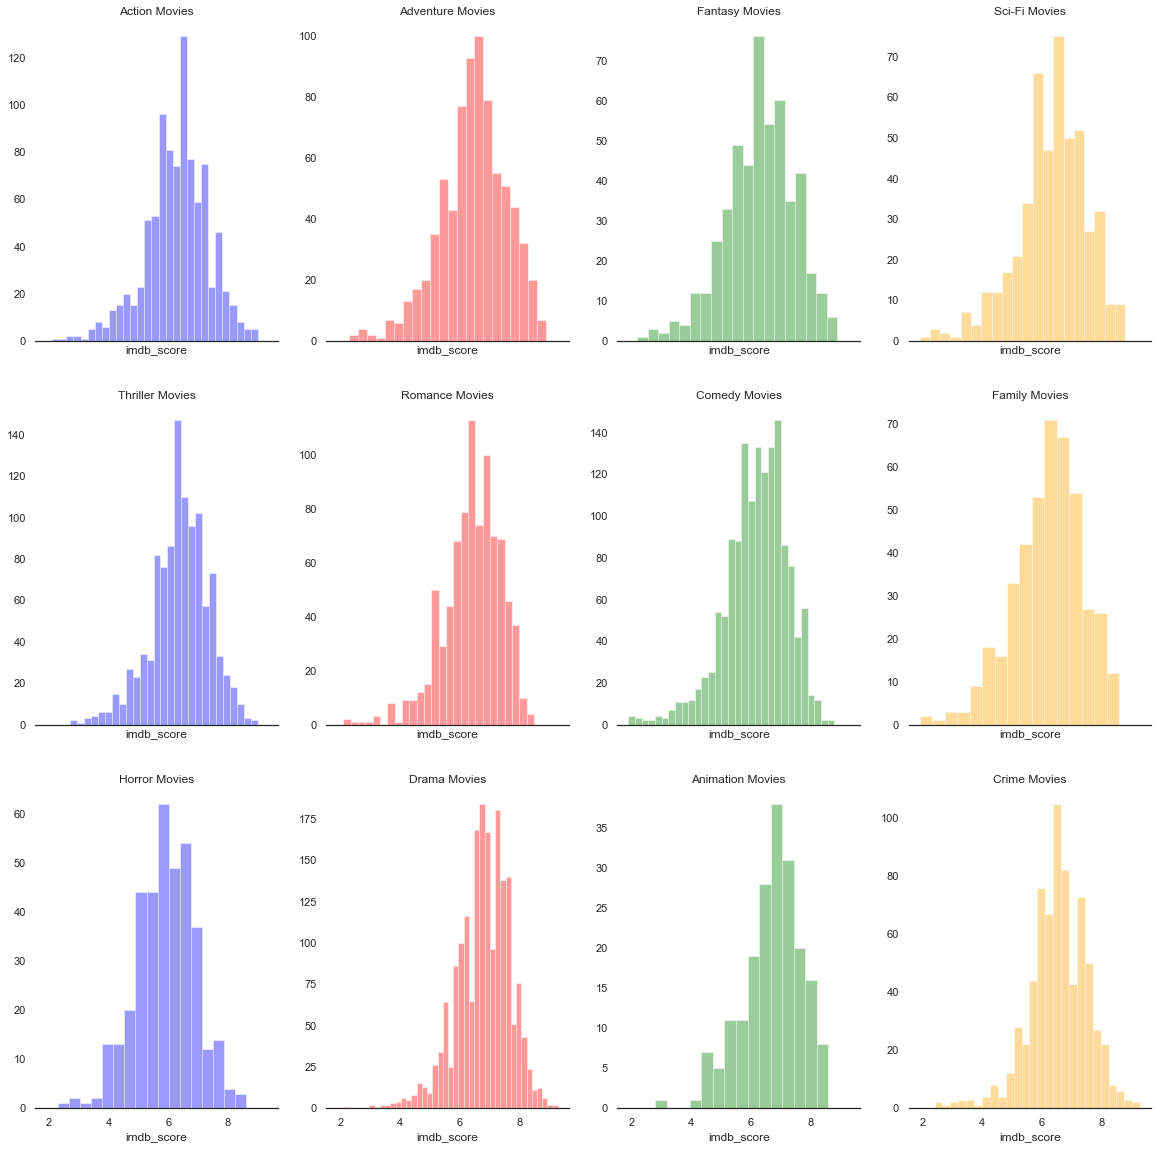

In [132]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(3, 4, figsize=(20, 20), sharex=True)
sns.despine(left=True)

sns.distplot(temp_act.imdb_score, kde=False, color="blue", ax=axes[0, 0]).set_title('Action Movies')
sns.distplot(temp_adv.imdb_score, kde=False, color="red", ax=axes[0, 1]).set_title('Adventure Movies')
sns.distplot(temp_fan.imdb_score, kde=False, color="green", ax=axes[0, 2]).set_title('Fantasy Movies')
sns.distplot(temp_sci.imdb_score, kde=False, color="orange", ax=axes[0, 3]).set_title('Sci-Fi Movies')
sns.distplot(temp_thr.imdb_score, kde=False, color="blue", ax=axes[1, 0]).set_title('Thriller Movies')
sns.distplot(temp_rom.imdb_score, kde=False, color="red", ax=axes[1, 1]).set_title('Romance Movies')
sns.distplot(temp_com.imdb_score, kde=False, color="green", ax=axes[1, 2]).set_title('Comedy Movies')
sns.distplot(temp_fam.imdb_score, kde=False, color="orange", ax=axes[1, 3]).set_title('Family Movies')
sns.distplot(temp_hor.imdb_score, kde=False, color="blue", ax=axes[2, 0]).set_title('Horror Movies')
sns.distplot(temp_dra.imdb_score, kde=False, color="red", ax=axes[2, 1]).set_title('Drama Movies')
sns.distplot(temp_ani.imdb_score, kde=False, color="green", ax=axes[2, 2]).set_title('Animation Movies')
sns.distplot(temp_crime.imdb_score, kde=False, color="orange", ax=axes[2, 3]).set_title('Crime Movies')

Looking at some of the more commonly made movie genres, we can see that the IMDB ratings are usually around 6-8 for most genres except for horror which is 5-7 and thriller being slightly higher than that. 

We can visualize this data in many more ways, but we got the gist of how the ratings work. For most movies, the ratings average out between 5-8. 

Now that the visualization is over, let us get into the pre-processing stage to get the data ready for machine learning. 

<a id='section10'></a>
<font size="4">**4 Data Pre-Processing**</font>

<a id='section11'></a>
<font size="3">**4.1 Drop Columns**</font>

This step is essential as certain columns are not useful for predictions. Variables like names, movie IMDB link, plot keywords vary with most movies which makes these variables impossible to be valuable predictors. 

In [133]:
dataRaw = dataRaw.drop(['director_name', 'actor_2_name', 'actor_1_name','movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link'], axis=1)

<a id='section12'></a>
<font size="3">**4.2 Bin IMDB Ratings**</font>

The target of this project is to predict if a movie is going to be good or bad for this; we do not need the absolute score. We just need bins of the ratings so the ratings will be split into less than 2, 2 to 4, 4 to 6, 6 to 8 and more than 8. 

In [106]:
custom_bucket_array = np.linspace(0,10,6)
dataRaw.imdb_score = pd.cut(dataRaw['imdb_score'], custom_bucket_array)
dataRaw.imdb_score = dataRaw.imdb_score.astype(str)
dataRaw = dataRaw.replace({'imdb_score': { '(0.0, 2.0]': 0,'(2.0, 4.0]': 1,'(4.0, 6.0]': 2,'(6.0, 8.0]': 3,'(8.0, 10.0]': 4}})

<a id='section13'></a>
<font size="3">**4.4 Convert Object data to Numberical**</font>

Most machine learning algorithms need the data to be numerical. In our data 'language', 'country' and 'content_rating' are not in a numerical format so they need to be converted to that format before we can proceed.


In [6]:
dataRaw = dataRaw.replace({'country': {'USA': 1,'UK': 2,'France': 3,'Others': 0}})
dataRaw = dataRaw.replace({'content_rating': {'R': 1,'PG-13': 2,'PG': 3,'G': 4,'X': 0 }})

<a id='section14'></a>
<font size="3">**4.3 Training and Testing Data Split**</font>

We now seperate the train, validation and test data.

In [59]:
Y=dataRaw.imdb_score
X=dataRaw.drop(['imdb_score'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

<a id='section15'></a>
<font size="4">**5 Implementing Machine Learning Algorithms**</font>

The assignment required this project to have three machine learning algorithms and to compare their performance. In this project, we are going to implement XGBoost, Random Forest and Neural Networks using keras and tensorflow.

<a id='section16'></a>
<font size="3">**5.1 XGBoost**</font>

XGBoost stands for Extreme Gradient Boosting, it is a type of decision tree. It has gained popularity in recent times for its powerful performance on tabular data. Since we have such data, this algorithm is worth a shot.  

In [60]:
#-------------- XGboost (untuned) ----------------#
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 5, alpha = 10, eval_metric="auc")
#objective ='multi:softmax'
#objective ='binary:logistic'
xg_reg.fit(x_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, eval_metric='auc', gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

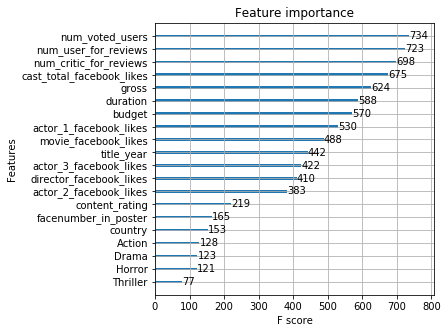

In [61]:
xgb.plot_importance(xg_reg,max_num_features = 20)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [62]:
from sklearn.metrics import accuracy_score
from math import sqrt


pred_train = xg_reg.predict(x_train)
rms_train = accuracy_score(y_train, pred_train)

pred_test = xg_reg.predict(x_test)
rms_test = accuracy_score(y_test, pred_test)

#del Xtrain, Ytrain
#gc.collect()
print('Train Accuracy: {0} Test Accuracy: {1}'.format(rms_train*100, rms_test*100))

Train Accuracy: 87.08065667380443 Test Accuracy: 79.01498929336188


XGBoost seems to offer an accuracy of 79.01% on test data. Lets now try using Random Forest. 

<a id='section17'></a>
<font size="3">**5.2 Random Forest**</font>

Random forest algorithm creates multiple decision trees on randomly selected sample data. It gets predictions for each tree and selects the best solution. 

In [63]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
model = model.fit(x_train, y_train)
feature_imp = pd.Series(model.feature_importances_,index=x_train.columns.values).sort_values(ascending=False)

No handles with labels found to put in legend.


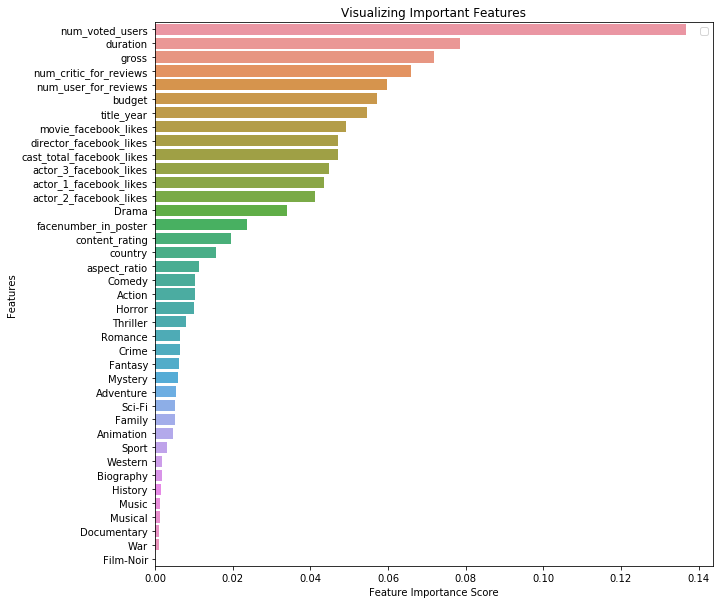

In [64]:

# Creating a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [78]:
# predictions
pred_train = model.predict(x_train)
rms_train = accuracy_score(y_train, pred_train)

pred_test = model.predict(x_test)
rms_test = accuracy_score(y_test, pred_test)

print('Train Accuracy: {0} Test Accuracy: {1}'.format(rms_train*100, rms_test*100))

Train Accuracy: 98.60813704496788 Test Accuracy: 76.12419700214133


With training accuracy of over 98%, which indicates that there could be some overfitting, but the accuracy on testing data is still only 76.12%.


<a id='section18'></a>
<font size="3">**5.3 Neural Networks**</font>

The third machine learning algorithm is going to be a neural network using Keras and Tensorflow. Neural networks are robust algorithms that can be used for both classification and regression problem with relative ease and performance to compliment that. We are going to see how it compares to XGBoost.

Before we can apply neural networks, the data needs to be modified to fit this algorithm. First, we need to convert all 'X' data to [0,1] and the 'Y' data to categorical data with five columns representing the number of classes instead of one column.

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
Y = to_categorical(Y, num_classes=5)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [103]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Activation
from keras.optimizers import Adam, RMSprop, SGD
from keras.utils.np_utils import to_categorical 
from keras.utils import np_utils
import tensorflow as tf

nn_model = Sequential()
nn_model.add(Dense(10, input_dim=39 , activation = 'relu'))
nn_model.add(Dense(10, input_dim=10 , activation = 'relu'))
nn_model.add(Dense(10, input_dim=10 , activation = 'relu'))
nn_model.add(Dense(5, activation ='softmax'))
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.05)
nn_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

nn_model.fit(x_train, y_train, nb_epoch=100, batch_size=10)


D:\Users\hari0\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Epoch 1/100
2802/2802 [==============================] - 1s 402us/step - loss: 1.1448 - acc: 0.6146
Epoch 2/100
2802/2802 [==============================] - 0s 95us/step - loss: 0.7981 - acc: 0.6602
Epoch 3/100
2802/2802 [==============================] - 0s 87us/step - loss: 0.6825 - acc: 0.7052
Epoch 4/100
2802/2802 [==============================] - 0s 85us/step - loss: 0.6257 - acc: 0.7352
Epoch 5/100
2802/2802 [==============================] - 0s 88us/step - loss: 0.5913 - acc: 0.7527
Epoch 6/100
2802/2802 [==============================] - 0s 90us/step - loss: 0.5719 - acc: 0.7559
Epoch 7/100
2802/2802 [==============================] - 0s 88us/step - loss: 0.5545 - acc: 0.7616
Epoch 8/100
2802/2802 [==============================] - 0s 82us/step - loss: 0.5405 - acc: 0.7673
Epoch 9/100
2802/2802 [==============================] - 0s 92us/step - loss: 0.5321 - acc: 0.7730
Epoch 10/100
2802/2802 [==============================] - 0s 119us/step - loss: 0.5241 - acc: 0.7748
Epoch 1

In [104]:
trainScore, trainAcc = nn_model.evaluate(x_train, y_train)
testScore, testAcc = nn_model.evaluate(x_test, y_test)

print('Train Accuracy: {0} Test Accuracy: {1}'.format(trainAcc*100, testAcc*100))

934/934 [==============================] - 0s 18us/step
Train Accuracy: 85.08208422555317 Test Accuracy: 75.2676659528908


The neural network using Adam optimizer  seems to give 75.26% accuracy. This is slightly lower than the random forest. 

<a id='section19'></a>
<font size="4">**6 Conclusion**</font>

Table for the accuracy of different models is shown below.


| Dataset |  RGBoost   | Random Forest |  Neural Networks   |
|---------|------------|---------------|--------------------|
|   Training  | 87.08| 98.60 |  85.08   |
|  Testing   |  79.01   |  76.12   |  75.26     |


XGBoost has the highest accuracy on testing data despite having only 87% accuracy on training data. Even neural networks have a relatively high accuracy for testing data with only 85% accuracy on training data. Whereas Random Forest is showing a very high accuracy of 98% on training data but just showing slightly better performance on testing data as compared to neural networks. This is a typical issue with random forest because it can overfit on data easily.. 